该数据集有 4177 个观察值，8个输入变量和1个输出变量。 变量名如下： 性别 长度 直径 高度 总重量 皮重 内脏重量 壳重

是回归问题,用分类效果很差

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score                          # higher is better
from sklearn.metrics import mean_absolute_error, mean_squared_error # lower is better
from sklearn.metrics import r2_score                                # higher is better
from pathlib import Path

# load data

In [207]:
base_path = Path("../data")
base_path

WindowsPath('../../datasets')

In [208]:
data_path = base_path / "AbaloneAgePrediction.csv"
data_path

WindowsPath('../../datasets/AbaloneAgePrediction.csv')

In [209]:
data = pd.read_csv(data_path)
data.head()

,gender,length,diameter,height,total weight,tare,visceral weight,shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4177 non-null   object 
 1   length           4177 non-null   float64
 2   diameter         4177 non-null   float64
 3   height           4177 non-null   float64
 4   total weight     4177 non-null   float64
 5   tare             4177 non-null   float64
 6   visceral weight  4177 non-null   float64
 7   shell weight     4177 non-null   float64
 8   age              4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [211]:
data.describe()

,length,diameter,height,total weight,tare,visceral weight,shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## gender

In [212]:
np.unique(data["gender"])

array(['F', 'I', 'M'], dtype=object)

In [213]:
data.loc[data["gender"] == "F", "gender"] = 0
data.loc[data["gender"] == "I", "gender"] = 1
data.loc[data["gender"] == "M", "gender"] = 2

In [214]:
data["gender"] = data["gender"].astype(np.int32)

In [215]:
np.unique(data["gender"])

array([0, 1, 2])

In [216]:
data.head()

,gender,length,diameter,height,total weight,tare,visceral weight,shell weight,age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [217]:
X = data.drop("age", axis=1)
X.head()

,gender,length,diameter,height,total weight,tare,visceral weight,shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [218]:
y = data["age"]
y.head()

0    15
1     7
2     9
3    10
4     7
Name: age, dtype: int64

In [219]:
np.unique(y)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29], dtype=int64)

## train_test_split

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2088, 8), (2089, 8), (2088,), (2089,))

# KNeighbors

## KNeighborsClassifier

In [221]:
from sklearn.neighbors import KNeighborsClassifier

In [222]:
kn = KNeighborsClassifier()
kn

KNeighborsClassifier()

In [223]:
kn.fit(X_train, y_train)

KNeighborsClassifier()

In [224]:
kn.score(X_test, y_test)

0.237912876974629

In [225]:
np.array(y_test)

array([13,  8, 11, ..., 14, 12, 10], dtype=int64)

In [226]:
y_pred = kn.predict(X_test)
y_pred

array([13,  9,  9, ...,  8, 10, 10], dtype=int64)

In [227]:
accuracy_score(y_test, y_pred)

0.237912876974629

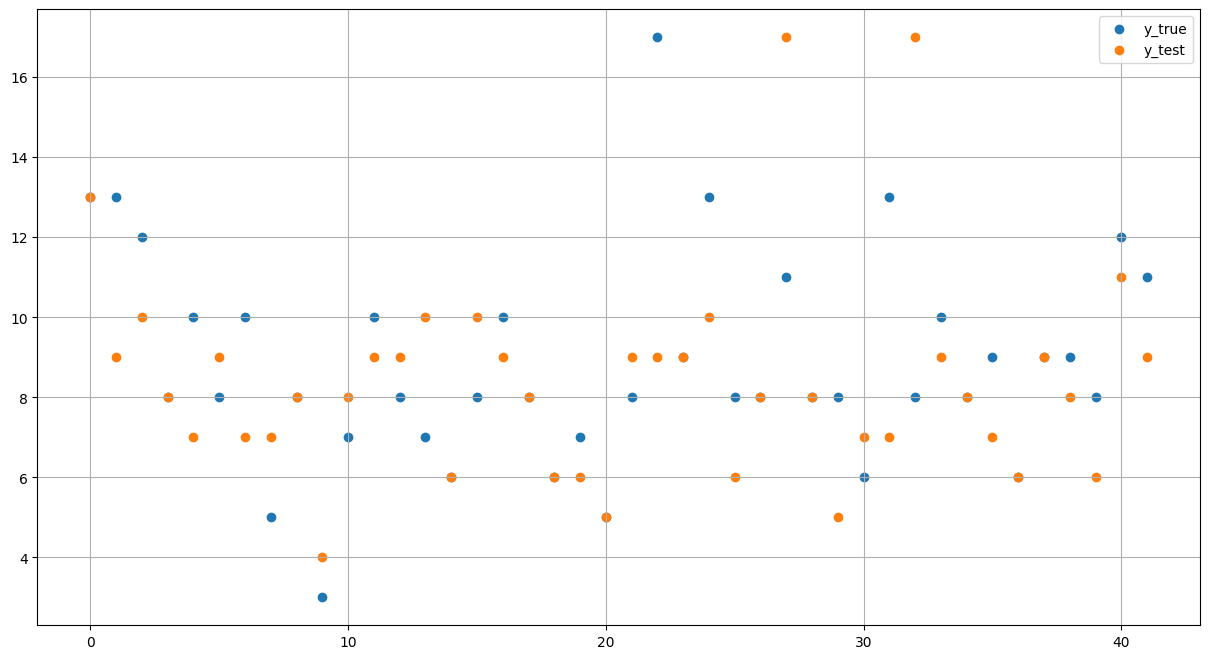

In [228]:
skip_size = 50

plt.figure(figsize=(15, 8))
plt.scatter(range(len(y_test[::skip_size])), y_test[::skip_size], label="y_true")
plt.scatter(range(len(y_pred[::skip_size])), y_pred[::skip_size], label="y_test")
plt.grid(True)
plt.legend()

## KNeighborsRegressor

In [229]:
from sklearn.neighbors import KNeighborsRegressor

In [230]:
kn = KNeighborsRegressor()
kn

KNeighborsRegressor()

In [231]:
kn.fit(X_train, y_train)

KNeighborsRegressor()

In [232]:
kn.score(X_test, y_test)

0.5064108540412988

In [233]:
np.array(y_test)

array([13,  8, 11, ..., 14, 12, 10], dtype=int64)

In [234]:
y_pred = kn.predict(X_test)
y_pred

array([14.4,  9.6, 10.2, ..., 11.4, 12. , 10.2])

In [235]:
print(mean_absolute_error(y_test, y_pred))  # lower is better
print(mean_squared_error(y_test, y_pred))   # lower is better
print(r2_score(y_test, y_pred))             # higher is better

1.579894686452848
5.122987075155578
0.5064108540412988


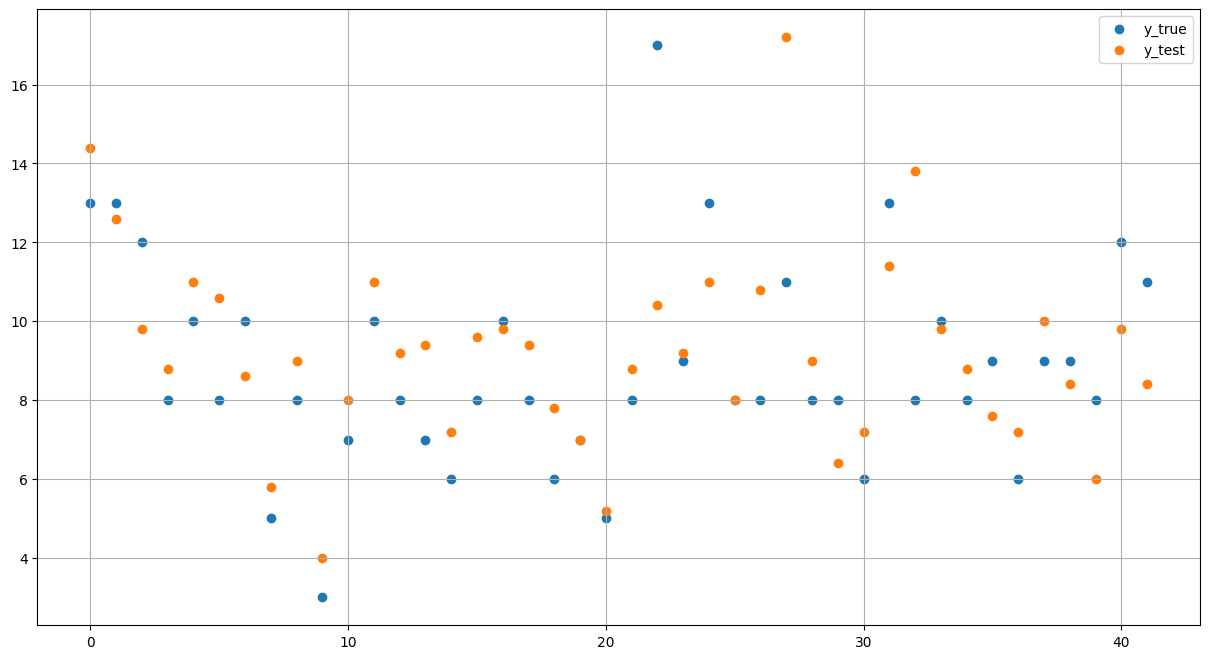

In [236]:
skip_size = 50

plt.figure(figsize=(15, 8))
plt.scatter(range(len(y_test[::skip_size])), y_test[::skip_size], label="y_true")
plt.scatter(range(len(y_pred[::skip_size])), y_pred[::skip_size], label="y_test")
plt.grid(True)
plt.legend()

# DecisionTree

## DecisionTreeClassifier

In [237]:
from sklearn.tree import DecisionTreeClassifier

In [238]:
dt = DecisionTreeClassifier()
dt

DecisionTreeClassifier()

In [239]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [240]:
dt.score(X_test, y_test)

0.18669219722355193

In [241]:
np.array(y_test)

array([13,  8, 11, ..., 14, 12, 10], dtype=int64)

In [242]:
y_pred = dt.predict(X_test)
y_pred

array([14,  9,  9, ..., 13,  9, 10], dtype=int64)

In [243]:
accuracy_score(y_test, y_pred)

0.18669219722355193

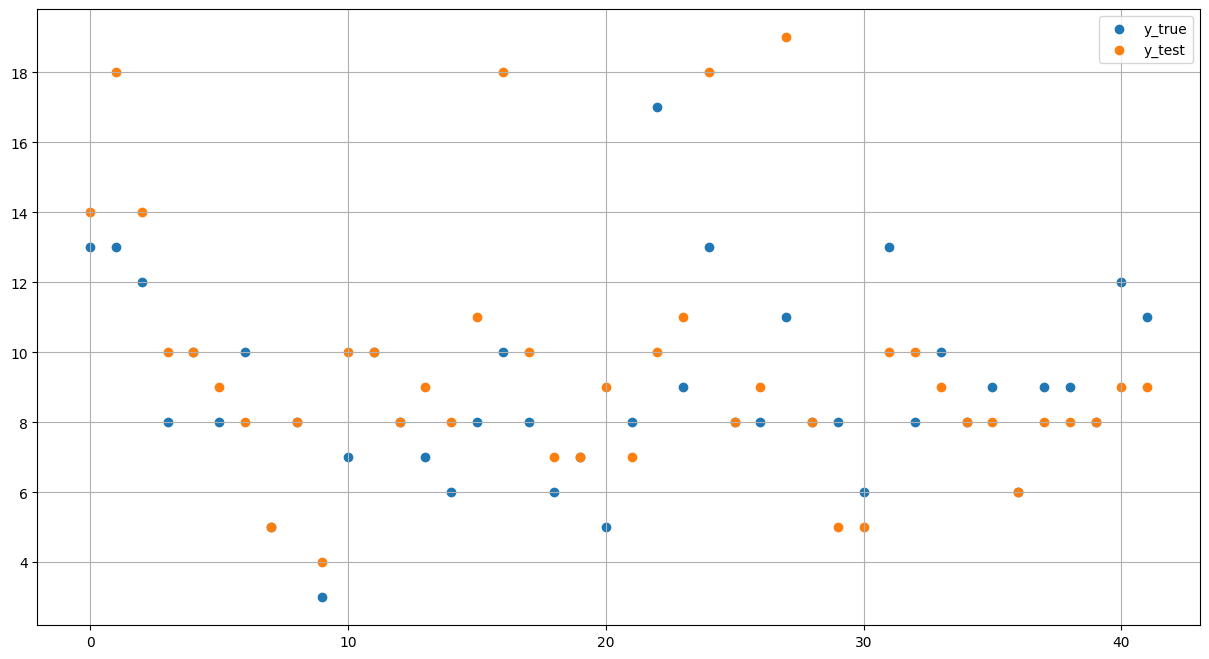

In [244]:
skip_size = 50

plt.figure(figsize=(15, 8))
plt.scatter(range(len(y_test[::skip_size])), y_test[::skip_size], label="y_true")
plt.scatter(range(len(y_pred[::skip_size])), y_pred[::skip_size], label="y_test")
plt.grid(True)
plt.legend()

## DecisionTreeRegressor

In [245]:
from sklearn.tree import DecisionTreeRegressor

In [246]:
dt = DecisionTreeRegressor()
dt

DecisionTreeRegressor()

In [247]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [248]:
dt.score(X_test, y_test)

0.1694892363913829

In [249]:
np.array(y_test)

array([13,  8, 11, ..., 14, 12, 10], dtype=int64)

In [250]:
y_pred = dt.predict(X_test)
y_pred

array([14.,  9.,  8., ..., 13., 10., 10.])

In [251]:
print(mean_absolute_error(y_test, y_pred))  # lower is better
print(mean_squared_error(y_test, y_pred))   # lower is better
print(r2_score(y_test, y_pred))             # higher is better

2.031115366203925
8.619913834370513
0.1694892363913829


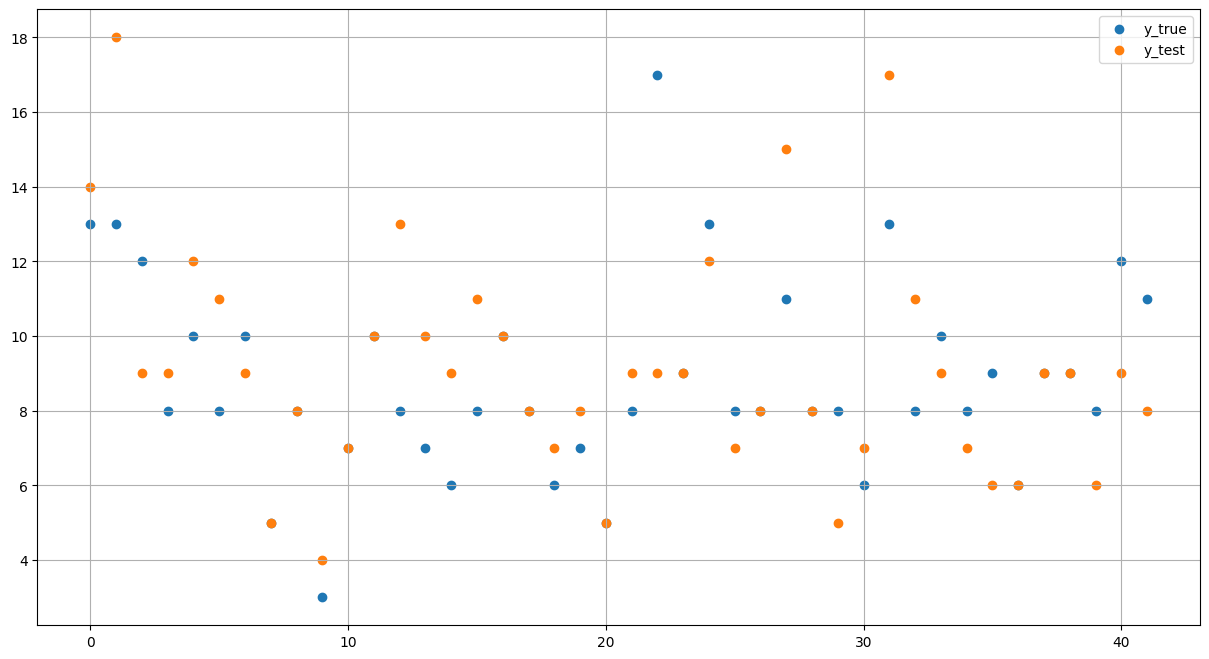

In [252]:
skip_size = 50

plt.figure(figsize=(15, 8))
plt.scatter(range(len(y_test[::skip_size])), y_test[::skip_size], label="y_true")
plt.scatter(range(len(y_pred[::skip_size])), y_pred[::skip_size], label="y_test")
plt.grid(True)
plt.legend()

# RandomForest

## RandomForestClassifier

In [253]:
from sklearn.ensemble import RandomForestClassifier

In [254]:
rf = RandomForestClassifier()
rf

RandomForestClassifier()

In [255]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [256]:
rf.score(X_test, y_test)

0.2398276687410244

In [257]:
np.array(y_test)

array([13,  8, 11, ..., 14, 12, 10], dtype=int64)

In [258]:
y_pred = rf.predict(X_test)
y_pred

array([19,  9, 10, ..., 13, 10, 10], dtype=int64)

In [259]:
accuracy_score(y_test, y_pred)

0.2398276687410244

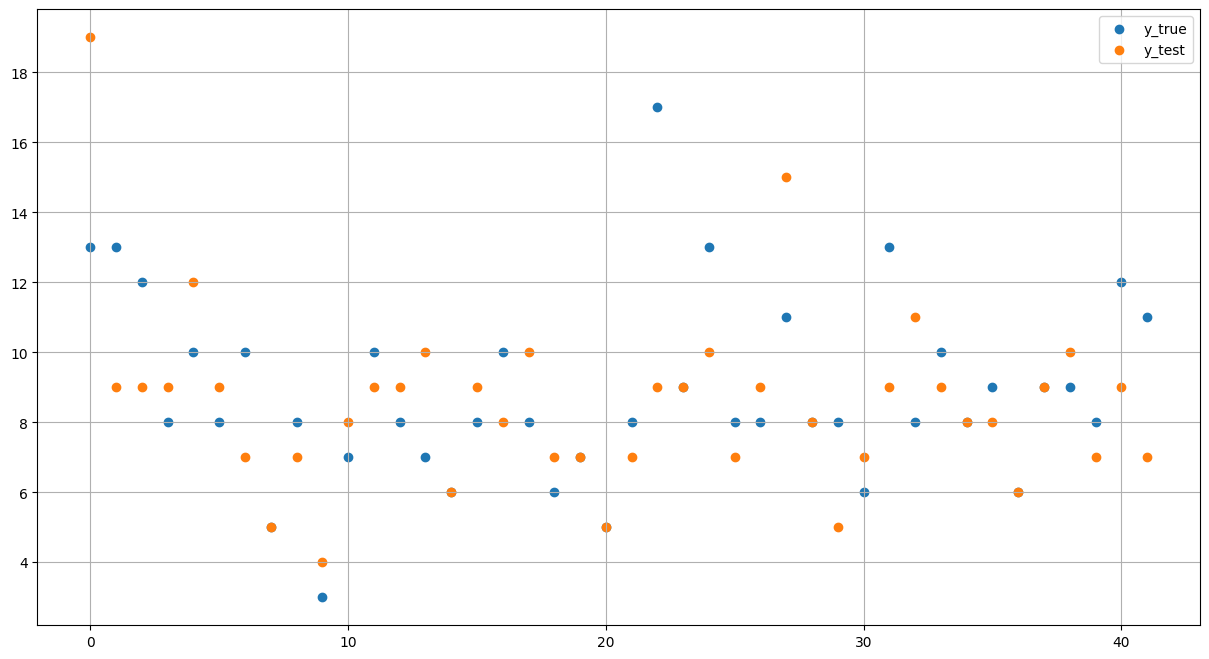

In [260]:
skip_size = 50

plt.figure(figsize=(15, 8))
plt.scatter(range(len(y_test[::skip_size])), y_test[::skip_size], label="y_true")
plt.scatter(range(len(y_pred[::skip_size])), y_pred[::skip_size], label="y_test")
plt.grid(True)
plt.legend()

## RandomForestRegressor

In [261]:
from sklearn.ensemble import RandomForestRegressor

In [262]:
rf = RandomForestRegressor()
rf

RandomForestRegressor()

In [263]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [264]:
rf.score(X_test, y_test)

0.5350450774992185

In [265]:
np.array(y_test)

array([13,  8, 11, ..., 14, 12, 10], dtype=int64)

In [266]:
y_pred = rf.predict(X_test)
y_pred

array([14.62,  9.98, 10.48, ..., 13.7 , 11.31, 10.21])

In [267]:
print(mean_absolute_error(y_test, y_pred))  # lower is better
print(mean_squared_error(y_test, y_pred))   # lower is better
print(r2_score(y_test, y_pred))             # higher is better

1.5554332216371471
4.825791000478698
0.5350450774992185


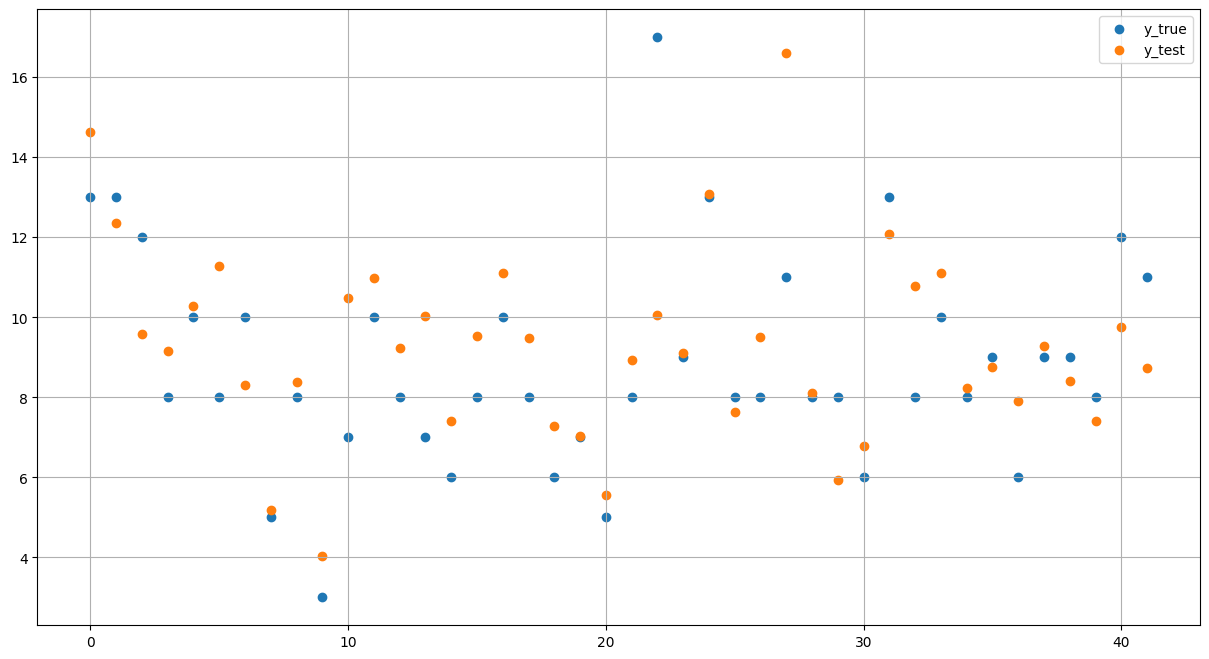

In [268]:
skip_size = 50

plt.figure(figsize=(15, 8))
plt.scatter(range(len(y_test[::skip_size])), y_test[::skip_size], label="y_true")
plt.scatter(range(len(y_pred[::skip_size])), y_pred[::skip_size], label="y_test")
plt.grid(True)
plt.legend()

# svm

## SVC

In [269]:
from sklearn.svm import SVC

In [270]:
sv = SVC()
sv

SVC()

In [271]:
sv.fit(X_train, y_train)

SVC()

In [272]:
sv.score(X_test, y_test)

0.2407850646242221

In [273]:
np.array(y_test)

array([13,  8, 11, ..., 14, 12, 10], dtype=int64)

In [274]:
y_pred = sv.predict(X_test)
y_pred

array([ 9,  8, 10, ...,  9, 10, 10], dtype=int64)

In [275]:
accuracy_score(y_test, y_pred)

0.2407850646242221

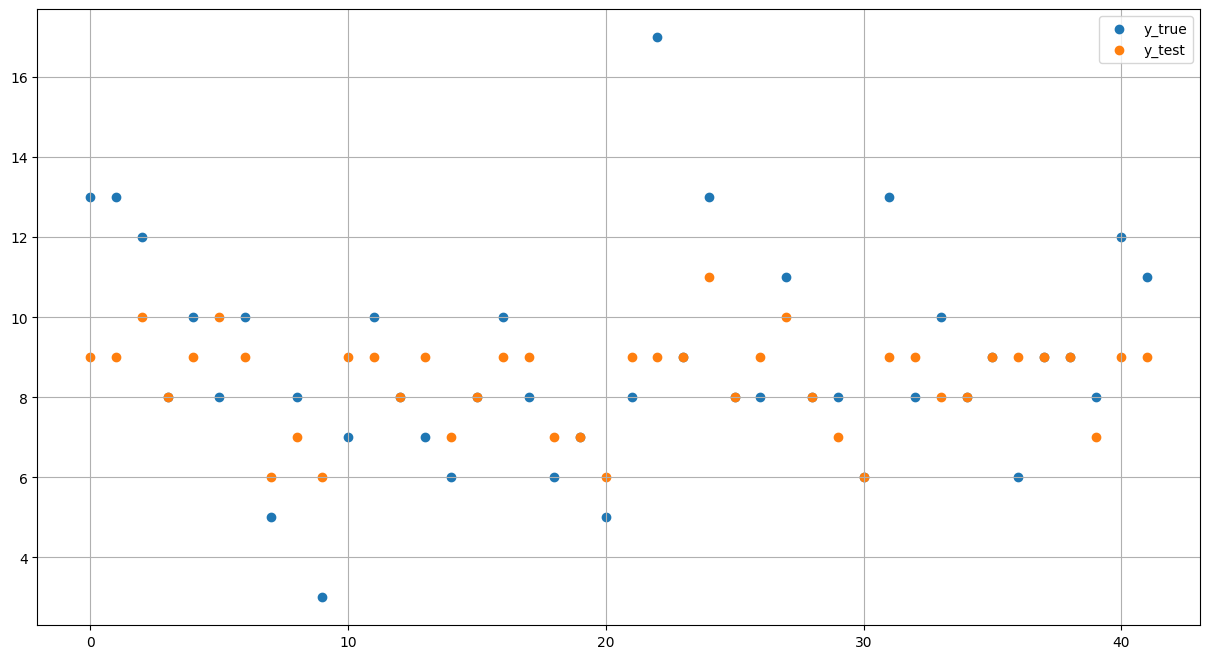

In [276]:
skip_size = 50

plt.figure(figsize=(15, 8))
plt.scatter(range(len(y_test[::skip_size])), y_test[::skip_size], label="y_true")
plt.scatter(range(len(y_pred[::skip_size])), y_pred[::skip_size], label="y_test")
plt.grid(True)
plt.legend()

## SVR

In [277]:
from sklearn.svm import SVR

In [278]:
sv = SVR()
sv

SVR()

In [279]:
sv.fit(X_train, y_train)

SVR()

In [280]:
sv.score(X_test, y_test)

0.46240330061074997

In [281]:
np.array(y_test)

array([13,  8, 11, ..., 14, 12, 10], dtype=int64)

In [282]:
y_pred = sv.predict(X_test)
y_pred

array([11.76607722,  8.87885545, 10.4078992 , ..., 10.63671594,
       11.30578646, 10.44490571])

In [283]:
print(mean_absolute_error(y_test, y_pred))  # lower is better
print(mean_squared_error(y_test, y_pred))   # lower is better
print(r2_score(y_test, y_pred))             # higher is better

1.5590276961532665
5.579743730523327
0.46240330061074997


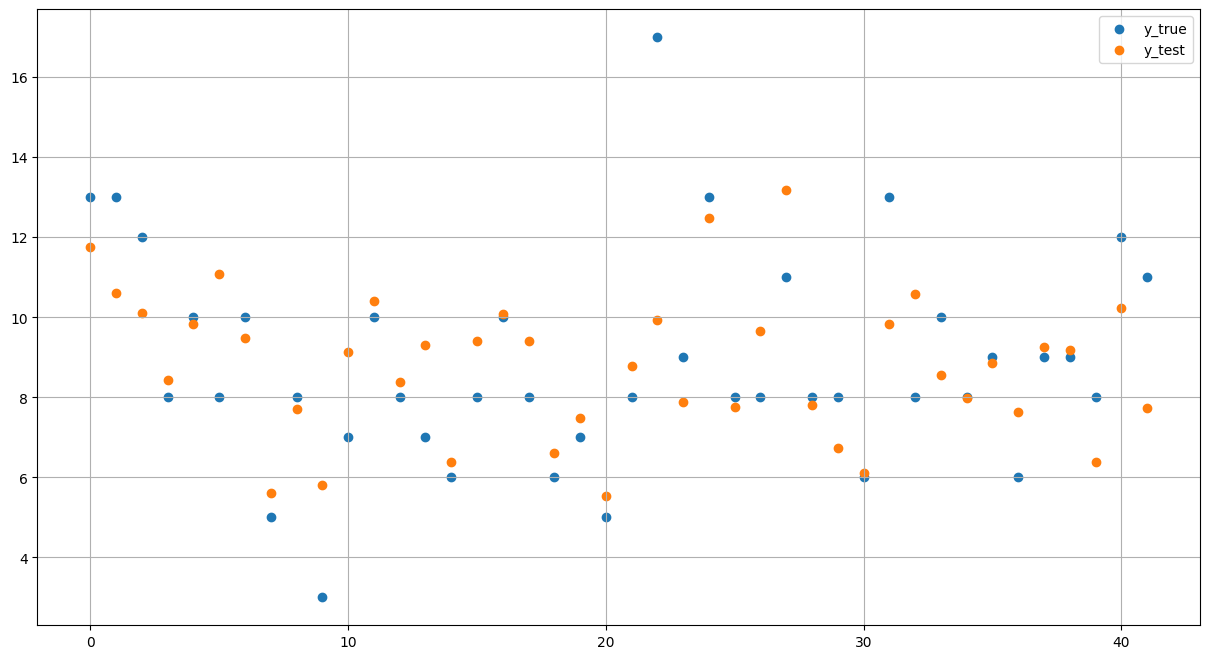

In [284]:
skip_size = 50

plt.figure(figsize=(15, 8))
plt.scatter(range(len(y_test[::skip_size])), y_test[::skip_size], label="y_true")
plt.scatter(range(len(y_pred[::skip_size])), y_pred[::skip_size], label="y_test")
plt.grid(True)
plt.legend()

# xgboost

## XGBClassifier

In [285]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()
xgb

In [ ]:
xgb.fit(X_train, y_train)

In [ ]:
xgb.score(X_test, y_test)

In [ ]:
np.array(y_test)

array([13,  8, 11, ..., 14, 12, 10], dtype=int64)

In [ ]:
y_pred = xgb.predict(X_test)
y_pred

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
skip_size = 50

plt.figure(figsize=(15, 8))
plt.scatter(range(len(y_test[::skip_size])), y_test[::skip_size], label="y_true")
plt.scatter(range(len(y_pred[::skip_size])), y_pred[::skip_size], label="y_test")
plt.grid(True)
plt.legend()

## XGBRegressor

In [288]:
from xgboost import XGBRegressor

In [289]:
xgb = XGBRegressor()
xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [290]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [291]:
xgb.score(X_test, y_test)

0.4851996449152276

In [292]:
np.array(y_test)

array([13,  8, 11, ..., 14, 12, 10], dtype=int64)

In [293]:
y_pred = xgb.predict(X_test)
y_pred

array([15.792881, 10.194566, 10.870656, ..., 12.941217, 11.298844,
       10.698827], dtype=float32)

In [294]:
print(mean_absolute_error(y_test, y_pred))  # lower is better
print(mean_squared_error(y_test, y_pred))   # lower is better
print(r2_score(y_test, y_pred))             # higher is better

1.6453300969574427
5.3431393031593455
0.4851996449152276


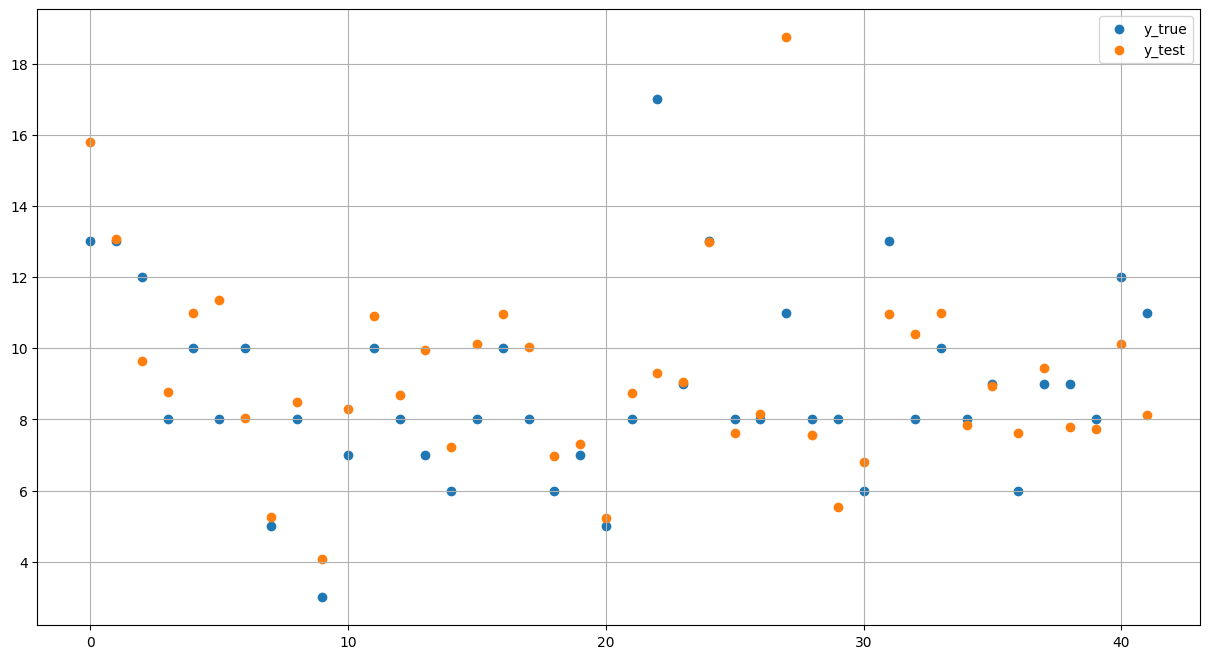

In [295]:
skip_size = 50

plt.figure(figsize=(15, 8))
plt.scatter(range(len(y_test[::skip_size])), y_test[::skip_size], label="y_true")
plt.scatter(range(len(y_pred[::skip_size])), y_pred[::skip_size], label="y_test")
plt.grid(True)
plt.legend()

# lightgbm

## LGBMClassifier

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgbm = XGBClassifier()
lgbm

In [ ]:
lgbm.fit(X_train, y_train)

In [ ]:
lgbm.score(X_test, y_test)

In [ ]:
np.array(y_test)

array([13,  8, 11, ..., 14, 12, 10], dtype=int64)

In [ ]:
y_pred = lgbm.predict(X_test)
y_pred

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
skip_size = 50

plt.figure(figsize=(15, 8))
plt.scatter(range(len(y_test[::skip_size])), y_test[::skip_size], label="y_true")
plt.scatter(range(len(y_pred[::skip_size])), y_pred[::skip_size], label="y_test")
plt.grid(True)
plt.legend()

## LGBMRegressor

In [296]:
from lightgbm import LGBMRegressor

In [297]:
lgbm = LGBMRegressor()
lgbm

LGBMRegressor()

In [298]:
lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1279
[LightGBM] [Info] Number of data points in the train set: 2088, number of used features: 8
[LightGBM] [Info] Start training from score 9.949713


LGBMRegressor()

In [299]:
lgbm.score(X_test, y_test)

0.5337368782178729

In [300]:
np.array(y_test)

array([13,  8, 11, ..., 14, 12, 10], dtype=int64)

In [301]:
y_pred = lgbm.predict(X_test)
y_pred

array([14.69683654,  9.78892264, 10.01807785, ..., 13.60481597,
       10.48334673,  9.35326285])

In [302]:
print(mean_absolute_error(y_test, y_pred))  # lower is better
print(mean_squared_error(y_test, y_pred))   # lower is better
print(r2_score(y_test, y_pred))             # higher is better

1.5670685003461609
4.839368867951947
0.5337368782178729


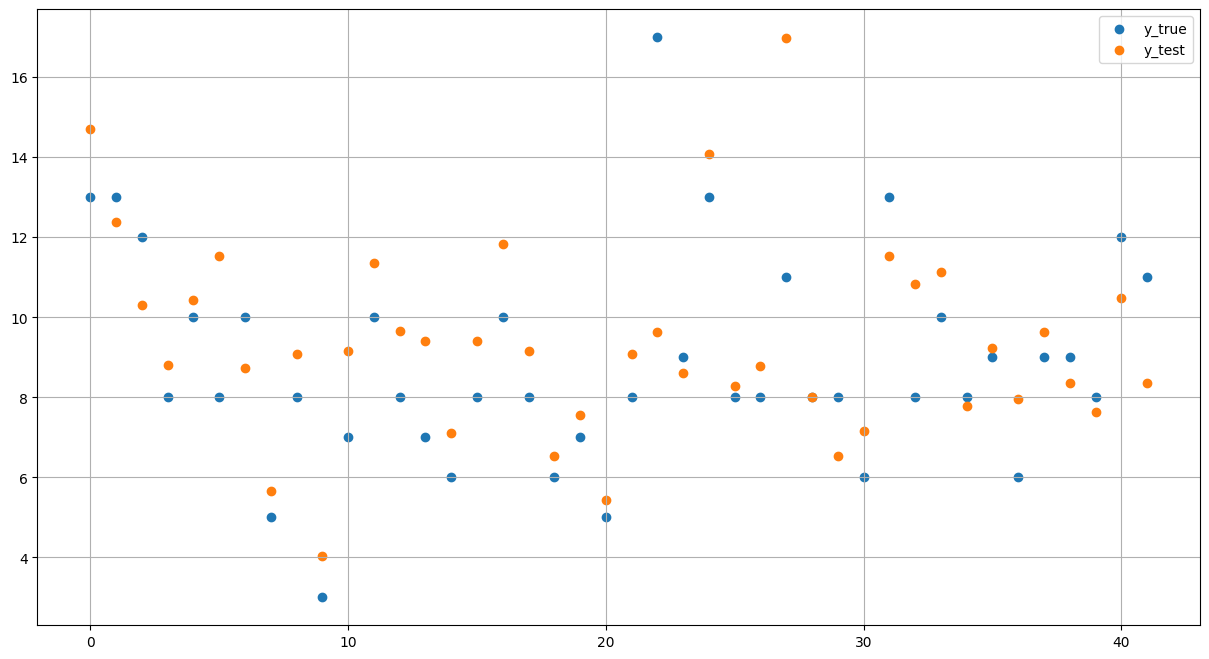

In [303]:
skip_size = 50

plt.figure(figsize=(15, 8))
plt.scatter(range(len(y_test[::skip_size])), y_test[::skip_size], label="y_true")
plt.scatter(range(len(y_pred[::skip_size])), y_pred[::skip_size], label="y_test")
plt.grid(True)
plt.legend()

# catboost

## CatBoostClassifier

In [312]:
from catboost import CatBoostClassifier

In [313]:
catb = CatBoostClassifier()
catb

In [314]:
catb.fit(X_train, y_train)

Learning rate set to 0.082154
0:	learn: 2.9833472	total: 18.6ms	remaining: 18.6s
1:	learn: 2.8459533	total: 36.6ms	remaining: 18.3s
2:	learn: 2.7375779	total: 54.4ms	remaining: 18.1s
3:	learn: 2.6554889	total: 71.2ms	remaining: 17.7s
4:	learn: 2.5877867	total: 88.4ms	remaining: 17.6s
5:	learn: 2.5256356	total: 108ms	remaining: 17.8s
6:	learn: 2.4739326	total: 127ms	remaining: 18s
7:	learn: 2.4266416	total: 146ms	remaining: 18.1s
8:	learn: 2.3884902	total: 165ms	remaining: 18.2s
9:	learn: 2.3548350	total: 184ms	remaining: 18.2s
10:	learn: 2.3211322	total: 203ms	remaining: 18.2s
11:	learn: 2.2930912	total: 221ms	remaining: 18.2s
12:	learn: 2.2684360	total: 240ms	remaining: 18.2s
13:	learn: 2.2471763	total: 259ms	remaining: 18.3s
14:	learn: 2.2226586	total: 279ms	remaining: 18.3s
15:	learn: 2.2013334	total: 300ms	remaining: 18.4s
16:	learn: 2.1847462	total: 318ms	remaining: 18.4s
17:	learn: 2.1667965	total: 337ms	remaining: 18.4s
18:	learn: 2.1527217	total: 354ms	remaining: 18.3s
19:	lear

In [315]:
catb.score(X_test, y_test)

0.24413595021541407

In [316]:
np.array(y_test)

array([13,  8, 11, ..., 14, 12, 10], dtype=int64)

In [317]:
y_pred = catb.predict(X_test)
y_pred.T[0]

array([13,  9, 10, ..., 10, 10, 10], dtype=int64)

In [318]:
accuracy_score(y_test, y_pred)

0.24413595021541407

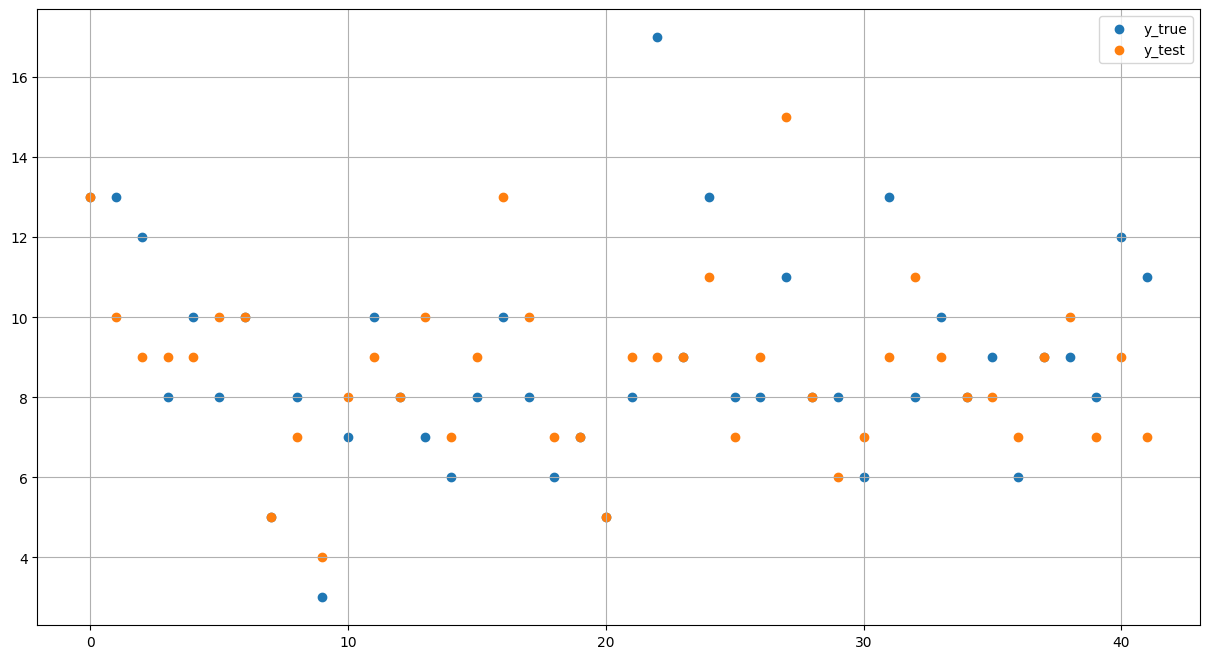

In [319]:
skip_size = 50

plt.figure(figsize=(15, 8))
plt.scatter(range(len(y_test[::skip_size])), y_test[::skip_size], label="y_true")
plt.scatter(range(len(y_pred[::skip_size])), y_pred[::skip_size], label="y_test")
plt.grid(True)
plt.legend()

## CatBoostRegressor

In [304]:
from catboost import CatBoostRegressor

In [305]:
catb = CatBoostRegressor()
catb

In [306]:
catb.fit(X_train, y_train)

Learning rate set to 0.045994
0:	learn: 3.1729371	total: 1.4ms	remaining: 1.4s
1:	learn: 3.1197591	total: 2.69ms	remaining: 1.34s
2:	learn: 3.0753637	total: 3.89ms	remaining: 1.29s
3:	learn: 3.0302537	total: 5.25ms	remaining: 1.31s
4:	learn: 2.9826849	total: 7.22ms	remaining: 1.44s
5:	learn: 2.9434823	total: 8.64ms	remaining: 1.43s
6:	learn: 2.9039645	total: 10.1ms	remaining: 1.43s
7:	learn: 2.8705731	total: 11.3ms	remaining: 1.4s
8:	learn: 2.8360500	total: 12.5ms	remaining: 1.37s
9:	learn: 2.8055546	total: 13.7ms	remaining: 1.35s
10:	learn: 2.7718103	total: 15.1ms	remaining: 1.35s
11:	learn: 2.7455806	total: 16.4ms	remaining: 1.35s
12:	learn: 2.7169692	total: 17.8ms	remaining: 1.35s
13:	learn: 2.6941218	total: 19.2ms	remaining: 1.35s
14:	learn: 2.6711563	total: 20.4ms	remaining: 1.34s
15:	learn: 2.6437851	total: 21.6ms	remaining: 1.33s
16:	learn: 2.6205959	total: 23.1ms	remaining: 1.34s
17:	learn: 2.6004325	total: 24.6ms	remaining: 1.34s
18:	learn: 2.5792038	total: 25.9ms	remaining: 1

In [307]:
catb.score(X_test, y_test)

0.539971762118915

In [308]:
np.array(y_test)

array([13,  8, 11, ..., 14, 12, 10], dtype=int64)

In [309]:
y_pred = catb.predict(X_test)
y_pred

array([16.28885189,  9.7722764 , 12.05092932, ..., 11.71971149,
       11.11390928, 10.07220214])

In [310]:
print(mean_absolute_error(y_test, y_pred))  # lower is better
print(mean_squared_error(y_test, y_pred))   # lower is better
print(r2_score(y_test, y_pred))             # higher is better

1.5399953332250682
4.774656687990829
0.539971762118915


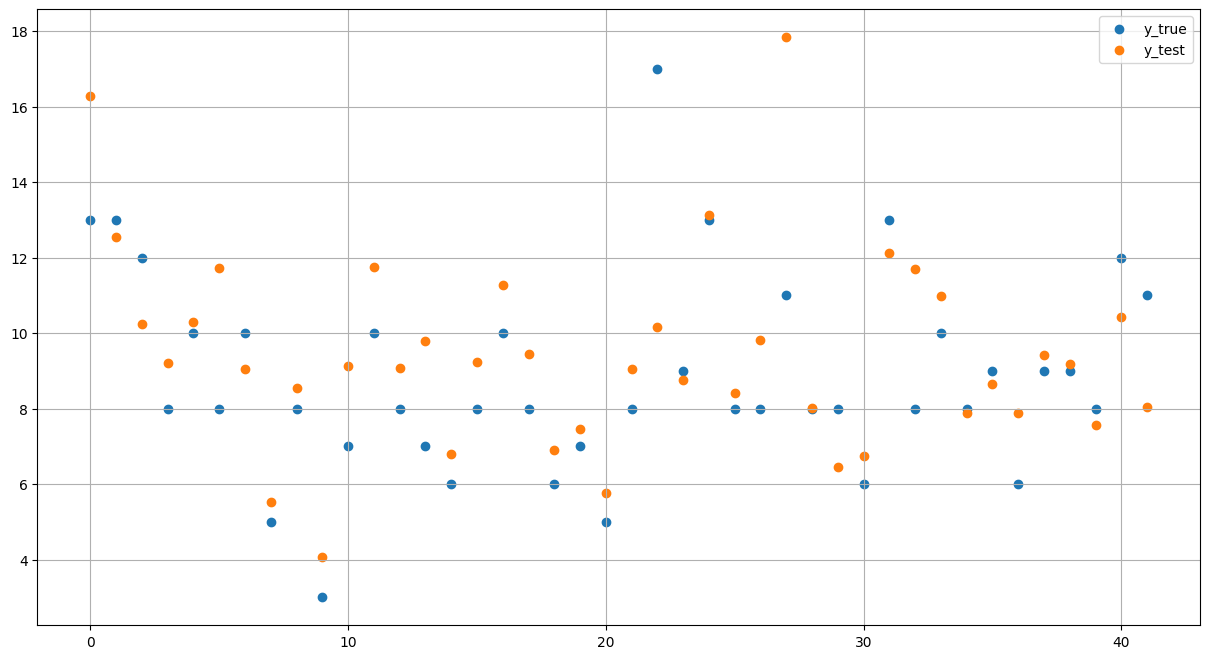

In [311]:
skip_size = 50

plt.figure(figsize=(15, 8))
plt.scatter(range(len(y_test[::skip_size])), y_test[::skip_size], label="y_true")
plt.scatter(range(len(y_pred[::skip_size])), y_pred[::skip_size], label="y_test")
plt.grid(True)
plt.legend()